# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:

#                       student details 1: Roy S 6564
#                       student details 2: Ofir H 9293
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This assignment focuses on a binary classification task using the Titanic dataset.
Each record in the dataset corresponds to a passenger and includes attributes such as travel class (Pclass), gender, age, number of siblings or spouses aboard (SibSp), number of parents or children (Parch), ticket fare, and port of embarkation (Embarked).
The dependent variable in this task is “Survived.” A value of 1 indicates that the individual lived, while a value of 0 shows that the individual did not.
The purpose is to develop predictive models capable of estimating the survival outcome for each passenger and to explore which features most strongly shaped the probability of survival.
The aim is not only to achieve reliable prediction results but also to uncover the main factors that affected the likelihood of surviving the Titanic disaster.  
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.decomposition import PCA

In [3]:
# LOAD DATASET
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

# Display the first 5 rows of each dataset
# The default value of head() is 5 so we don't need to specify it

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


## EDA
### Correlation Heatmap

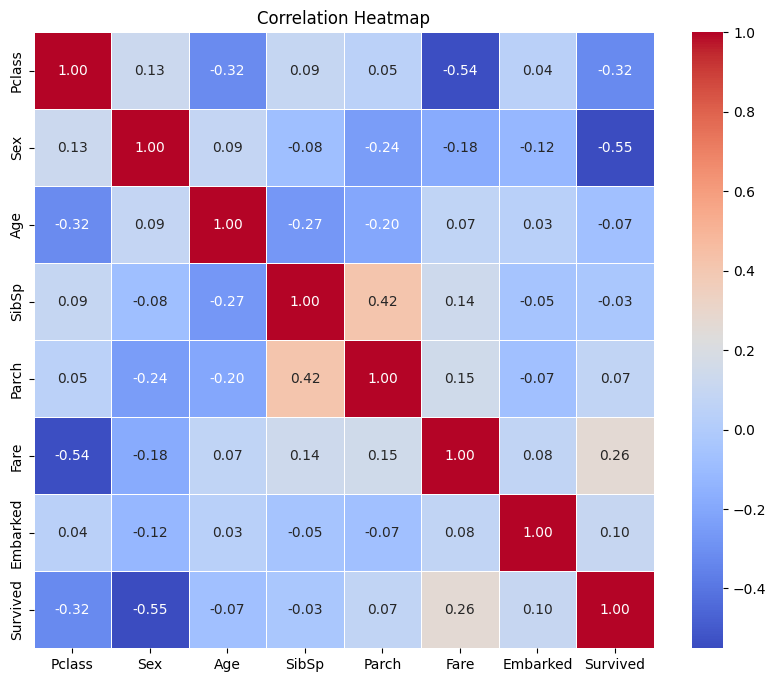

In [ ]:
# This code creates a heatmap to visualize correlations between the dataset’s features. 
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Pclass
#### counts


In [5]:
pclass_counts = train_data.Pclass.value_counts()
print(pclass_counts)

Pclass
3    388
1    178
2    146
Name: count, dtype: int64


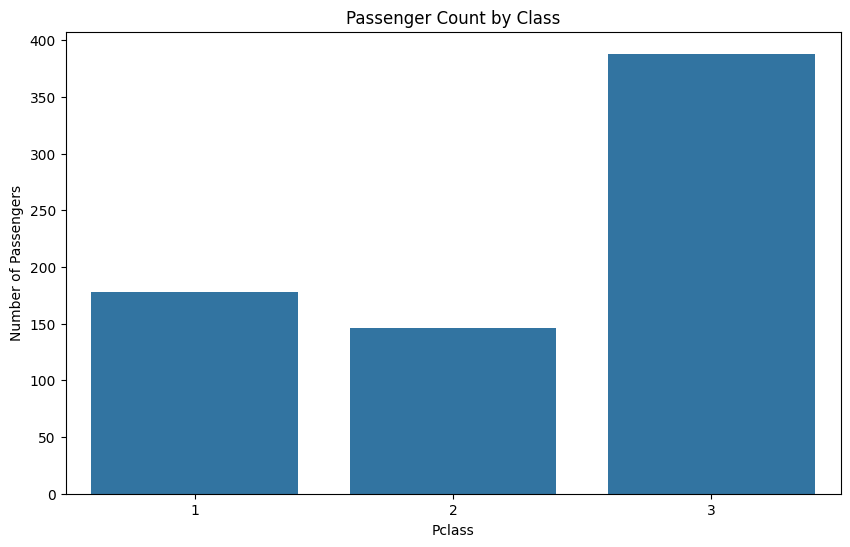

In [ ]:
# This code plots the number of passengers in each travel class (Pclass).
plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", data=train_data)
plt.title("Passenger Count by Class")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.show()

#### Relation To The Survival Rate


In [ ]:
# This code calculates and displays the survival rate (in %) for each passenger class (Pclass).
survival_rates_Pclass = train_data.groupby("Pclass")["Survived"].mean()
df = pd.DataFrame(survival_rates_Pclass)
df.columns = ["Survival Rate"]
df["Survival Rate"] = (df["Survival Rate"] * 100).map("{:.2f}%".format)
print(df)

       Survival Rate
Pclass              
1             63.48%
2             45.89%
3             26.03%


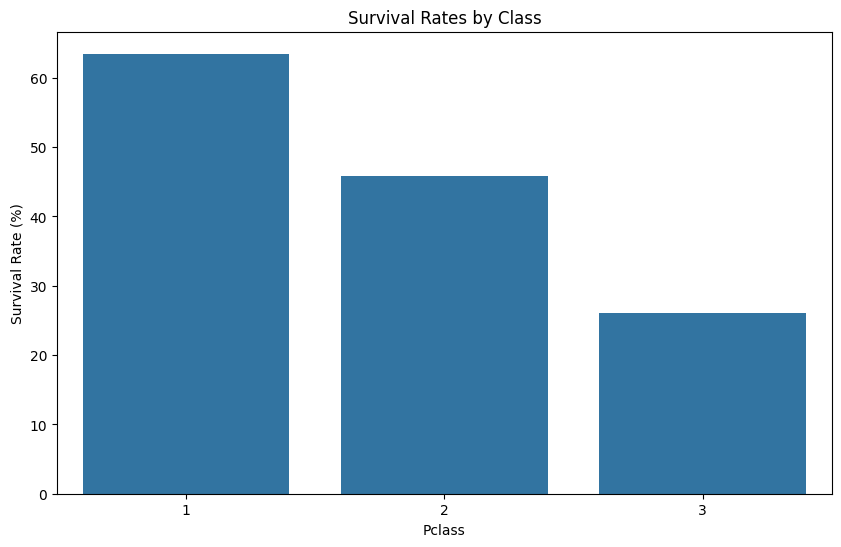

In [ ]:
# This code creates a bar chart showing survival rates (%) for each passenger class. 
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates_Pclass.index, y=survival_rates_Pclass.values * 100)
plt.title("Survival Rates by Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate (%)")
plt.show()

### Sex
#### counts

In [9]:
Sex_counts = train_data.Sex.value_counts()
print(Sex_counts)

Sex
1    456
0    256
Name: count, dtype: int64


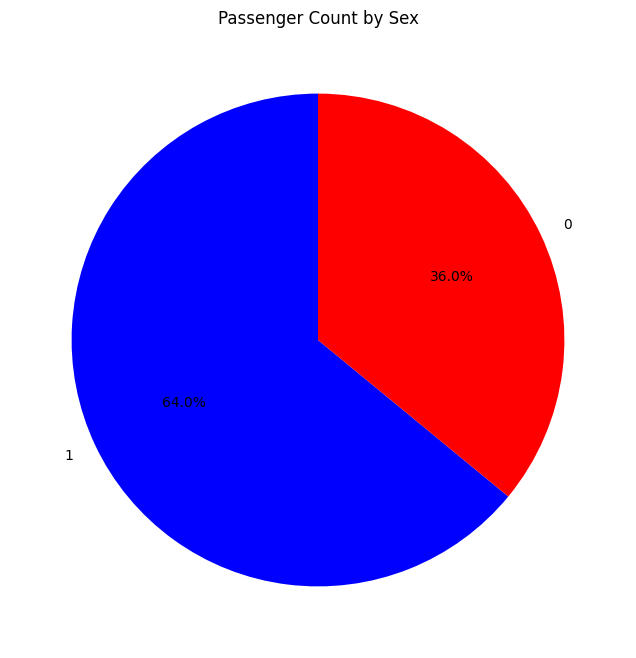

In [ ]:
# This code creates a pie chart showing the distribution of passengers by sex. 
plt.figure(figsize=(8, 8))
Sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title("Passenger Count by Sex")
plt.ylabel('')  
plt.show()

#### Relation To The Survival Rate

In [ ]:
# This code calculates and displays the survival rate (in %) for each sex. 
survival_rates_Sex = train_data.groupby("Sex")["Survived"].mean()
df = pd.DataFrame(survival_rates_Sex)
df.columns = ["Survival Rate"]
df["Survival Rate"] = (df["Survival Rate"] * 100).map("{:.2f}%".format)
print(df)

    Survival Rate
Sex              
0          75.39%
1          19.30%


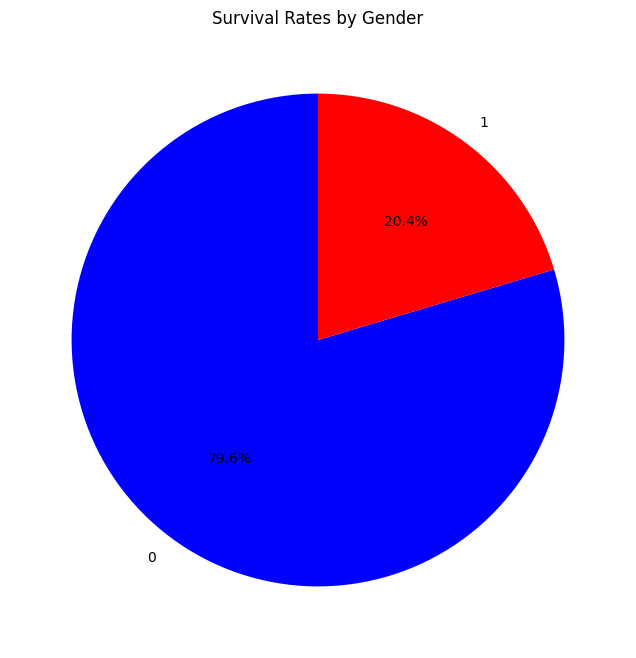

In [ ]:
# This code creates a pie chart showing survival rates (%) by sex.
plt.figure(figsize=(8, 8))
survival_rates_Sex.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title("Survival Rates by Gender")
plt.ylabel('')  
plt.show()

Basic statistics and Information About The Datasets

In [13]:
print("Train Data Statistics:")
print(train_data.describe())

print("\nTest Data Statistics:")
print(test_data.describe())

Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

## Part 3 - Experiments
You could add as many code cells as needed

### Feature Engineering

#### Data binning

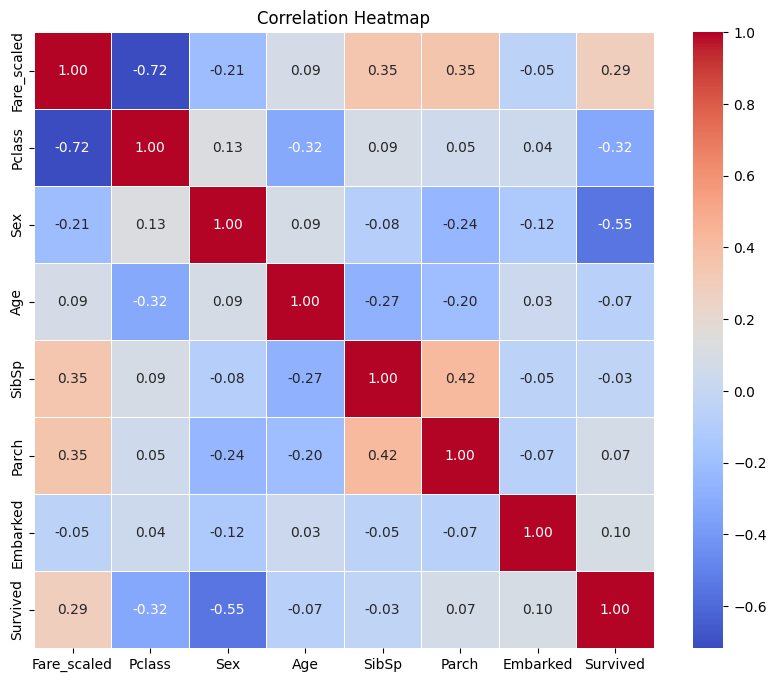

Transformed Train Data:
   Fare_scaled    Pclass       Sex   Age  SibSp  Parch  Embarked  Survived
0          2.0 -1.539037 -1.334635  54.0    1.0    0.0  0.966584       1.0
1          1.0 -0.350540 -1.334635  45.0    0.0    0.0 -0.573031       1.0
2          1.0  0.837957  0.749269  20.0    0.0    0.0 -0.573031       0.0
3          0.0  0.837957  0.749269  36.0    0.0    0.0 -0.573031       0.0
4          0.0  0.837957  0.749269  22.0    0.0    0.0 -0.573031       0.0

Transformed Test Data:
   Fare_scaled    Pclass       Sex        Age  SibSp  Parch  Embarked  \
0          0.0  0.837957  0.749269  35.000000    0.0    0.0 -0.573031   
1          0.0  0.837957  0.749269  30.000000    0.0    0.0 -0.573031   
2          1.0  0.837957  0.749269  29.699118    0.0    0.0 -0.573031   
3          0.0  0.837957 -1.334635  21.000000    0.0    0.0  2.506199   
4          2.0  0.837957  0.749269  32.000000    0.0    0.0 -0.573031   

   Survived  
0       0.0  
1       0.0  
2       0.0  
3      

In [ ]:
# Discretizes the "Fare" feature into three bins, keeps other columns unchanged, 
# converts transformed data to DataFrames, and displays a correlation heatmap.
fare_transformer = Pipeline(
    steps=[
        ("binning", KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile", quantile_method='linear')),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[("fare", fare_transformer, ["Fare"])], remainder="passthrough"
)

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

train_data_transformed = preprocessor.fit_transform(train_data_copy)
test_data_transformed = preprocessor.transform(test_data_copy)

feature_names = np.concatenate(
    [["Fare_scaled"], train_data_copy.columns[(train_data_copy.columns != "Fare")]]
)

train_data_transformed_df = pd.DataFrame(train_data_transformed, columns=feature_names)
test_data_transformed_df = pd.DataFrame(test_data_transformed, columns=feature_names)

# Correlation heatmap
corr_matrix = train_data_transformed_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Displaying the transformed data
print("Transformed Train Data:")
print(train_data_transformed_df.head())

print("\nTransformed Test Data:")
print(test_data_transformed_df.head())


#### Pearson correlation coefficient

In [ ]:
# Selects features with correlation > 0.08 with the target "Survived" and prints them.
corr_matrix = train_data.corr()
selected_features = corr_matrix["Survived"][abs(corr_matrix["Survived"]) > 0.08].index
selected_features = selected_features[selected_features != "Survived"]

print("Selected features:", selected_features)

Selected features: Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')


In [16]:
scaler = StandardScaler()
train_data[selected_features] = scaler.fit_transform(train_data[selected_features])
test_data[selected_features] = scaler.transform(test_data[selected_features])

print(train_data.head())

     Pclass       Sex   Age  SibSp  Parch      Fare  Embarked  Survived
0 -1.539037 -1.334635  54.0      1      0  0.921411  0.966584         1
1 -0.350540 -1.334635  45.0      0      0 -0.379097 -0.573031         1
2  0.837957  0.749269  20.0      0      0 -0.459416 -0.573031         0
3  0.837957  0.749269  36.0      0      0 -0.491629 -0.573031         0
4  0.837957  0.749269  22.0      0      0 -0.488532 -0.573031         0


### Training

In [17]:
X_train = train_data[selected_features]
y_train = train_data["Survived"]
X_val = test_data[selected_features]
y_val = test_data["Survived"]

#### Logistic regression

In [ ]:
# Performs hyperparameter tuning for Logistic Regression using GridSearchCV, 
# fits the model, and evaluates its accuracy and F1 score on the validation set.
param_grid = {'C': [0.1, 0.5], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression()
# cross validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
f1 = f1_score(y_val, y_pred_log_reg)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Logistic Regression F1 Score: {f1}")

Best Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.7597765363128491
Logistic Regression F1 Score: 0.6504065040650406


#### Random forest

In [ ]:
# Trains a Random Forest classifier, performs 5-fold cross-validation, 
# and evaluates its accuracy and F1 score on the validation set.
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# cross validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1}")

Cross-validation scores: [0.8041958  0.8041958  0.76760563 0.82394366 0.8028169 ]
Mean CV score: 0.8005515611149414
Random Forest Accuracy: 0.8379888268156425
Random Forest F1 Score: 0.7289719626168224


### Grid Search

In [ ]:
# Builds a pipeline with fare binning, feature selection, scaling, and a classifier (Logistic Regression or Random Forest). 
# Uses GridSearchCV with 5-fold stratified cross-validation to find the best hyperparameters based on F1 score.
preprocessor = ColumnTransformer(
    transformers=[
        (
            "fare_binning",
            KBinsDiscretizer(encode="ordinal", strategy="quantile", quantile_method="linear"),  # Set quantile_method explicitly
            ["Fare"],
        )
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("feature_selection", SelectKBest(f_classif)),
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression()),
    ]
)

param_grid = [
    {
        "preprocessor__fare_binning__n_bins": [2, 5, 7, 9, 11],
        "feature_selection__k": [1, 2, 3, "all"],
        "classifier": [LogisticRegression()],
        "classifier__C": [0.01, 0.1, 1, 10, 100],
        "classifier__solver": ["liblinear"],
    },
    {
        "preprocessor__fare_binning__n_bins": [2, 5, 7, 9, 11],
        "feature_selection__k": [1, 2, 3, "all"],
        "classifier": [RandomForestClassifier()],
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [3, 5, 7, None],
        "classifier__min_samples_split": [2, 4, 6],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__bootstrap": [True, False],
    },
]

cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring="f1", verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'classifier': RandomForestClassifier(), 'classifier__bootstrap': True, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 100, 'feature_selection__k': 3, 'preprocessor__fare_binning__n_bins': 5}
Best F1 score: 0.7344319996039653


In [ ]:
# Extracts and summarizes the best GridSearchCV results for each classifier, 
# displaying key hyperparameters and the corresponding mean F1 scores.
results_df = pd.DataFrame(grid_search.cv_results_)

results_df["classifier_type"] = results_df["param_classifier"].apply(
    lambda x: type(x).__name__
)

best_indices = results_df.groupby("classifier_type")["rank_test_score"].idxmin()
best_results_df = results_df.loc[best_indices]

summary_columns = {
    "classifier_type": "Classifier",
    "mean_test_score": "Mean F1 Score",
    "param_classifier__C": "C (LogReg)",
    "param_classifier__solver": "Solver (LogReg)",
    "param_classifier__n_estimators": "N Estimators (RF)",
    "param_classifier__max_depth": "Max Depth (RF)",
    "param_classifier__min_samples_split": "Min Samples Split (RF)",
    "param_classifier__min_samples_leaf": "Min Samples Leaf (RF)",
    "param_classifier__bootstrap": "Bootstrap (RF)",
}
summary_df = best_results_df[list(summary_columns.keys())].rename(
    columns=summary_columns
)

print(summary_df)

                 Classifier  Mean F1 Score  C (LogReg) Solver (LogReg)  \
12       LogisticRegression       0.719364        0.01       liblinear   
251  RandomForestClassifier       0.734432         NaN             NaN   

     N Estimators (RF) Max Depth (RF)  Min Samples Split (RF)  \
12                 NaN            NaN                     NaN   
251              100.0              3                     6.0   

     Min Samples Leaf (RF) Bootstrap (RF)  
12                     NaN            NaN  
251                    1.0           True  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [43]:
best_params = grid_search.best_params_

In [ ]:
# Builds and trains the final pipeline using the best hyperparameters: 
# fare binning, feature selection, scaling, and a Random Forest classifier.  
fare_binning_n_bins = best_params["preprocessor__fare_binning__n_bins"]

preprocessor = ColumnTransformer(
    transformers=[
        (
            "fare_binning",
            KBinsDiscretizer(
                n_bins=fare_binning_n_bins, encode="ordinal", strategy="quantile", quantile_method="linear" 
            ),
            ["Fare"],
        )
    ],
    remainder="passthrough",  
)

feature_selection_k = best_params["feature_selection__k"]
feature_selection = SelectKBest(f_classif, k=feature_selection_k)

classifier = RandomForestClassifier(
    n_estimators=best_params["classifier__n_estimators"],
    max_depth=best_params["classifier__max_depth"],
    min_samples_split=best_params["classifier__min_samples_split"],
    min_samples_leaf=best_params["classifier__min_samples_leaf"],
    bootstrap=best_params["classifier__bootstrap"],
)

final_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("feature_selection", feature_selection),
        ("scaler", StandardScaler()),
        ("classifier", classifier),
    ]
)

final_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('fare_binning', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Part 5 - Apply on test and show model performance estimation

In [ ]:
# Uses the trained final model to make predictions on the test set 
# and evaluates its accuracy and F1 score. Prints the first five predictions.
X_test = test_data.copy()
if "Survived" in X_test.columns:
    y_test = X_test["Survived"]
else:
    y_test = None  
y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Final Model Accuracy on Test Data: {accuracy_test}")
print(f"Final Model F1 Score on Test Data: {f1_test}")
print("\nFirst 5 predictions on Test Data:")
print(y_pred_test[:5])

Final Model Accuracy on Test Data: 0.8212290502793296
Final Model F1 Score on Test Data: 0.7142857142857143

First 5 predictions on Test Data:
[0 0 0 1 0]
